In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
file = '../dataframes/enh_norm.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,aire_acond,antiguedad,bano_comp,bano_excus,bano_regad,bomba_agua,calefacc,calentador,chimenea,...,tot_hom,tot_integ,tot_muj,celular,tel_fijo,tv_paga,año,CVE_ENT,CVE_MUN,CVE_LOC
0,0,81.382586,30,2,0,0,23.615688,97.90686,26.074029,97.048971,...,3,4,1,33.337648,37.504707,43.199256,1,1,1,1
1,1,81.382586,30,2,0,0,23.615688,97.90686,26.074029,97.048971,...,2,6,4,66.662352,37.504707,43.199256,1,1,1,1
2,2,81.382586,42,2,0,0,23.615688,97.90686,73.925971,97.048971,...,3,4,1,33.337648,37.504707,43.199256,2,1,1,1
3,3,81.382586,42,2,0,0,23.615688,97.90686,73.925971,97.048971,...,2,6,4,66.662352,37.504707,43.199256,2,1,1,1
4,4,81.382586,26,2,1,0,23.615688,97.90686,26.074029,97.048971,...,3,4,1,33.337648,37.504707,56.800744,1,1,1,1


In [85]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [86]:
df.head()

,aire_acond,antiguedad,bano_comp,bano_excus,bano_regad,bomba_agua,calefacc,calentador,chimenea,cisterna,...,tot_hom,tot_integ,tot_muj,celular,tel_fijo,tv_paga,año,CVE_ENT,CVE_MUN,CVE_LOC
0,81.382586,30,2,0,0,23.615688,97.90686,26.074029,97.048971,19.451767,...,3,4,1,33.337648,37.504707,43.199256,1,1,1,1
1,81.382586,30,2,0,0,23.615688,97.90686,26.074029,97.048971,19.451767,...,2,6,4,66.662352,37.504707,43.199256,1,1,1,1
2,81.382586,42,2,0,0,23.615688,97.90686,73.925971,97.048971,19.451767,...,3,4,1,33.337648,37.504707,43.199256,2,1,1,1
3,81.382586,42,2,0,0,23.615688,97.90686,73.925971,97.048971,19.451767,...,2,6,4,66.662352,37.504707,43.199256,2,1,1,1
4,81.382586,26,2,1,0,23.615688,97.90686,26.074029,97.048971,19.451767,...,3,4,1,33.337648,37.504707,56.800744,1,1,1,1


In [87]:
df_copy = df.copy()

In [88]:
categoricos = ['aire_acond', 'bomba_agua', 'calefacc', 'calentador', 'chimenea', 'cisterna', 'cocina', 'combustible', 'computador', 'const_bano', 'const_coci', 'const_dorm', 'disp_agua', 'disp_elect', 'dotac_agua', 'drenaje', 'eli_basura', 'est_socio', 'excusado', 'fregadero', 'internet', 'lavadero', 'mat_pared', 'mat_pisos', 'mat_techos', 'medidor_luz', 'pileta', 'regadera', 'repar_agua', 'repar_cabl', 'repar_dren', 'repar_pard', 'repar_tech', 'sanit_agua', 'tam_loc', 'tanque_gas', 'tenencia', 'tinaco_azo', 'tipo_viv', 'uso_compar', 'celular', 'tel_fijo', 'tv_paga']
categoricos

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'combustible',
 'computador',
 'const_bano',
 'const_coci',
 'const_dorm',
 'disp_agua',
 'disp_elect',
 'dotac_agua',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'internet',
 'lavadero',
 'mat_pared',
 'mat_pisos',
 'mat_techos',
 'medidor_luz',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'sanit_agua',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tipo_viv',
 'uso_compar',
 'celular',
 'tel_fijo',
 'tv_paga']

In [89]:
numericos = []

for row in df_copy.columns:
    if row not in categoricos:
        if (row != 'CVE_MUN') & (row != 'CVE_LOC') & (row != 'CVE_ENT') & (row != 'año') :
#            print(row)
            numericos.append(row)
            
numericos

['antiguedad',
 'bano_comp',
 'bano_excus',
 'bano_regad',
 'cuart_dorm',
 'focos_ahor',
 'focos_inca',
 'num_cuarto',
 'tot_hog',
 'tot_hom',
 'tot_integ',
 'tot_muj']

In [90]:
df.aire_acond.value_counts()

81.382586    207467
18.617414     47461
Name: aire_acond, dtype: int64

In [91]:
df.aire_acond.mode()

0    81.382586
dtype: float64

In [92]:
#f = {df_copy[categoricos]:['prod'], df_copy[numericos]:['mean']}

f = {}

for column in df_copy.columns:
#    print(column)
    if(column in df_copy[categoricos].columns):
#        print(column, 'categoricos')
        f[column] = lambda x: x.value_counts().index[0]
    elif(column in df_copy[numericos].columns):
#        print(column, 'numericos')
        f[column] = 'mean'
    
f

{'aire_acond': <function __main__.<lambda>(x)>,
 'antiguedad': 'mean',
 'bano_comp': 'mean',
 'bano_excus': 'mean',
 'bano_regad': 'mean',
 'bomba_agua': <function __main__.<lambda>(x)>,
 'calefacc': <function __main__.<lambda>(x)>,
 'calentador': <function __main__.<lambda>(x)>,
 'chimenea': <function __main__.<lambda>(x)>,
 'cisterna': <function __main__.<lambda>(x)>,
 'cocina': <function __main__.<lambda>(x)>,
 'combustible': <function __main__.<lambda>(x)>,
 'computador': <function __main__.<lambda>(x)>,
 'const_bano': <function __main__.<lambda>(x)>,
 'const_coci': <function __main__.<lambda>(x)>,
 'const_dorm': <function __main__.<lambda>(x)>,
 'cuart_dorm': 'mean',
 'disp_agua': <function __main__.<lambda>(x)>,
 'disp_elect': <function __main__.<lambda>(x)>,
 'dotac_agua': <function __main__.<lambda>(x)>,
 'drenaje': <function __main__.<lambda>(x)>,
 'eli_basura': <function __main__.<lambda>(x)>,
 'est_socio': <function __main__.<lambda>(x)>,
 'excusado': <function __main__.<lam

In [93]:
grouped = df_copy.groupby(by=['CVE_ENT', 'CVE_MUN', 'CVE_LOC']).agg(f)

In [94]:
grouped.head()

aire_acond  antiguedad  bano_comp  bano_excus  \
CVE_ENT CVE_MUN CVE_LOC                                                  
1       1       1         81.382586   21.976078   1.284423    0.193068   
                126       81.382586   25.333333   1.000000    0.000000   
                138       81.382586   27.285714   0.761905    0.333333   
                144       81.382586   20.944444   0.500000    0.555556   
                162       81.382586   13.000000   1.000000    0.200000   

                         bano_regad  bomba_agua  calefacc  calentador  \
CVE_ENT CVE_MUN CVE_LOC                                                 
1       1       1          0.005651   76.384312  97.90686   73.925971   
                126        0.000000   76.384312  97.90686   26.074029   
                138        0.000000   76.384312  97.90686   73.925971   
                144        0.111111   76.384312  97.90686   73.925971   
                162        0.000000   76.384312  97.90686   73.925971   

                          chimenea   cisterna    ...      tinaco_azo  \
CVE_ENT CVE_MUN CVE_LOC                          ...                   
1       1       1        97.048971  80.548233    ...       56.074264   
                126      97.048971  80.548233    ...       56.074264   
                138      97.048971  80.548233    ...       56.074264   
                144      97.048971  80.548233    ...       56.074264   
                162      97.048971  80.548233    ...       56.074264   

                          tipo_viv   tot_hog  uso_compar   tot_hom  tot_integ  \
CVE_ENT CVE_MUN CVE_LOC                                                         
1       1       1        95.460287  1.029007   95.360651  1.823507   3.719345   
                126      95.460287  1.000000   95.360651  2.444444   4.111111   
                138      95.460287  1.095238   95.360651  1.952381   4.190476   
                144      95.460287  1.000000   95.360651  1.833333   3.722222   
                162      95.460287  1.000000   95.360651  2.000000   4.200000   

                          tot_muj    celular   tel_fijo    tv_paga  
CVE_ENT CVE_MUN CVE_LOC                                             
1       1       1        1.895837  66.662352  62.495293  56.800744  
                126      1.666667  66.662352  62.495293  43.199256  
                138      2.238095  33.337648  62.495293  56.800744  
                144      1.888889  33.337648  62.495293  43.199256  
                162      2.200000  66.662352  62.495293  43.199256  

[5 rows x 55 columns]

In [95]:
grouped.shape

(5677, 55)

In [96]:
grouped_copy = grouped.copy()

In [97]:
grouped_copy.reset_index(inplace=True)
grouped_copy.columns

Index(['CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'aire_acond', 'antiguedad',
       'bano_comp', 'bano_excus', 'bano_regad', 'bomba_agua', 'calefacc',
       'calentador', 'chimenea', 'cisterna', 'cocina', 'combustible',
       'computador', 'const_bano', 'const_coci', 'const_dorm', 'cuart_dorm',
       'disp_agua', 'disp_elect', 'dotac_agua', 'drenaje', 'eli_basura',
       'est_socio', 'excusado', 'focos_ahor', 'focos_inca', 'fregadero',
       'internet', 'lavadero', 'mat_pared', 'mat_pisos', 'mat_techos',
       'medidor_luz', 'num_cuarto', 'pileta', 'regadera', 'repar_agua',
       'repar_cabl', 'repar_dren', 'repar_pard', 'repar_tech', 'sanit_agua',
       'tam_loc', 'tanque_gas', 'tenencia', 'tinaco_azo', 'tipo_viv',
       'tot_hog', 'uso_compar', 'tot_hom', 'tot_integ', 'tot_muj', 'celular',
       'tel_fijo', 'tv_paga'],
      dtype='object')

In [98]:
grouped_copy.head()

,CVE_ENT,CVE_MUN,CVE_LOC,aire_acond,antiguedad,bano_comp,bano_excus,bano_regad,bomba_agua,calefacc,...,tinaco_azo,tipo_viv,tot_hog,uso_compar,tot_hom,tot_integ,tot_muj,celular,tel_fijo,tv_paga
0,1,1,1,81.382586,21.976078,1.284423,0.193068,0.005651,76.384312,97.90686,...,56.074264,95.460287,1.029007,95.360651,1.823507,3.719345,1.895837,66.662352,62.495293,56.800744
1,1,1,126,81.382586,25.333333,1.000000,0.000000,0.000000,76.384312,97.90686,...,56.074264,95.460287,1.000000,95.360651,2.444444,4.111111,1.666667,66.662352,62.495293,43.199256
2,1,1,138,81.382586,27.285714,0.761905,0.333333,0.000000,76.384312,97.90686,...,56.074264,95.460287,1.095238,95.360651,1.952381,4.190476,2.238095,33.337648,62.495293,56.800744
3,1,1,144,81.382586,20.944444,0.500000,0.555556,0.111111,76.384312,97.90686,...,56.074264,95.460287,1.000000,95.360651,1.833333,3.722222,1.888889,33.337648,62.495293,43.199256
4,1,1,162,81.382586,13.000000,1.000000,0.200000,0.000000,76.384312,97.90686,...,56.074264,95.460287,1.000000,95.360651,2.000000,4.200000,2.200000,66.662352,62.495293,43.199256


In [99]:
grouped_copy.shape

(5677, 58)

In [100]:
grouped_copy.to_csv('../dataframes/enh_grouped.csv')

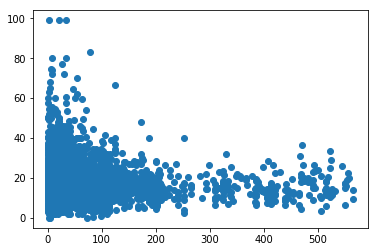

In [101]:
plt.scatter(grouped_copy.CVE_MUN, grouped_copy.antiguedad)

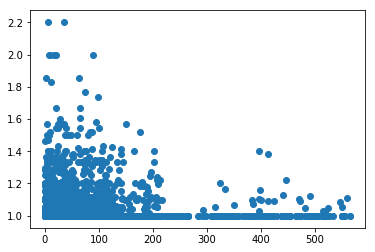

In [102]:
plt.scatter(grouped_copy.CVE_MUN, grouped_copy.tot_hog)

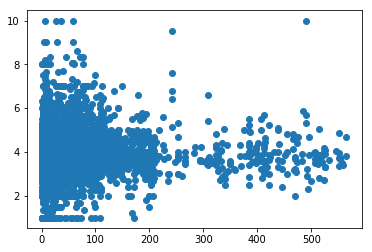

In [103]:
plt.scatter(grouped_copy.CVE_MUN, grouped_copy.tot_integ)

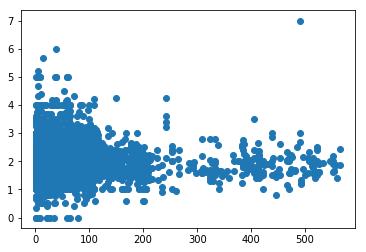

In [104]:
plt.scatter(grouped_copy.CVE_MUN, grouped_copy.tot_hom)

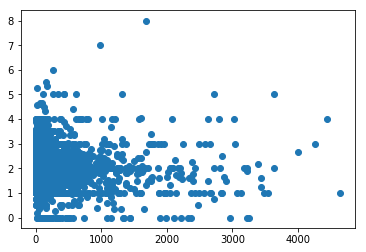

In [105]:
plt.scatter(grouped_copy.CVE_LOC, grouped_copy.tot_muj)